In [1]:
import uproot
import awkward as ak
import matplotlib.pyplot as plt
import numpy as np
import h5py

DATA_PATH = "/home/giovanni/pod/thesis/code/scripts-sources/W3Pi-selection-algorithm/data/"

In [46]:
with uproot.open(DATA_PATH + "l1Nano_WTo3Pion_PU200.root") as f:
    tree = f.get("Events")
    print(tree.keys())

    branches = tree.arrays()
    genPi_etas = branches["GenPi_eta"].to_numpy()
    genPi_pts = branches["GenPi_pt"].to_numpy()
    Puppi_pdgId = branches["Puppi_pdgId"]
    genPi_idx = branches["Puppi_GenPiIdx"]
    print(genPi_idx[4].tolist())
    

['run', 'luminosityBlock', 'event', 'bunchCrossing', 'orbitNumber', 'nEle', 'Ele_hwEta', 'Ele_hwPhi', 'Ele_hwPt', 'Ele_hwQual', 'Ele_quality', 'Ele_eta', 'Ele_idScore', 'Ele_mass', 'Ele_phi', 'Ele_pt', 'Ele_puppiIsol', 'Ele_puppiIsolPV', 'Ele_trkIsol', 'Ele_trkIsolPV', 'Ele_z0', 'nGenEle', 'GenEle_isFromTau', 'GenEle_isPrompt', 'GenEle_motherId', 'GenEle_dxy', 'GenEle_eta', 'GenEle_mass', 'GenEle_phi', 'GenEle_pt', 'GenEle_z0', 'nGenJet', 'GenJet_eta', 'GenJet_mass', 'GenJet_phi', 'GenJet_pt', 'nGenPho', 'GenPho_isFromTau', 'GenPho_isPrompt', 'GenPho_motherId', 'GenPho_dxy', 'GenPho_eta', 'GenPho_mass', 'GenPho_phi', 'GenPho_pt', 'GenPho_z0', 'nGenPi', 'GenPi_charge', 'GenPi_pdgId', 'GenPi_prompt', 'GenPi_eta', 'GenPi_mass', 'GenPi_phi', 'GenPi_pt', 'GenPi_z0', 'GenVtx_x', 'GenVtx_y', 'GenVtx_z', 'nGenW', 'GenW_charge', 'GenW_pdgId', 'GenW_eta', 'GenW_mass', 'GenW_phi', 'GenW_pt', 'GenW_z0', 'nL1Vtx', 'L1Vtx_sumpt', 'L1Vtx_z', 'nPho', 'Pho_hwEta', 'Pho_hwPhi', 'Pho_hwPt', 'Pho_hwQual',

In [59]:
file = DATA_PATH + "l1Nano_WTo3Pion_PU200.hdf5"

counter = 0

with h5py.File(file, "r") as f:
    for grp_name, grp in f.items():
        if grp.attrs["is_acc"] != 1 or grp.attrs["is_gm"] != 1:
            continue

        counter += 1

print(counter)

10389


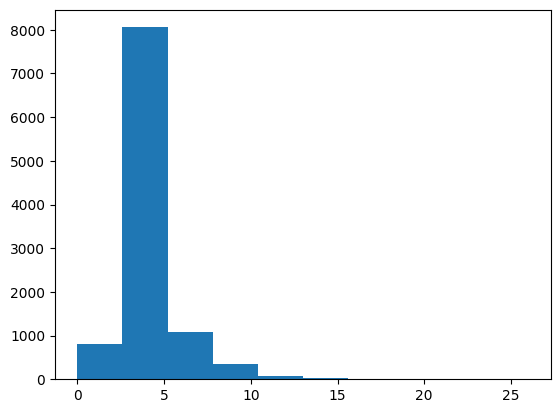

In [57]:
file = DATA_PATH + "l1Nano_WTo3Pion_PU200.hdf5"

histo = []

with h5py.File(file, "r") as f:
    for grp_name, grp in f.items():
        if grp.attrs["is_acc"] != 1 or grp.attrs["is_gm"] != 1:
            continue
        
        pts = grp["pt"][...]
        histo.append(len(pts[pts >= 7]))

plt.hist(histo);

In [51]:
file = DATA_PATH + "l1Nano_WTo3Pion_PU200.hdf5"

counter = 0

with h5py.File(file, "r") as f:
    for grp_name, grp in f.items():
        if grp.attrs["is_acc"] != 1:
            continue

        if grp.attrs["is_gm"] != 1:
            counter += 1

print(counter)

10038


In [35]:
file = DATA_PATH + "l1Nano_WTo3Pion_PU200_reco_v2.hdf5"

with h5py.File(file, "r") as f:
    grp = f["68"]
    print(grp["reco_triplet_idxs"][...])


[0 1 2]
